In this notebook we will perform hierarchical clustering on both unprocessed and processed data and compare the results. For more on hierarchical clustering using the Agglomerative clustering algorithm, see [HERE](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) and [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering).


In [ ]:
pip install -U sentence-transformers

In [2]:
import pandas as pd
import numpy as np

# Load the embeddings
df_orig_1_emb_distiluse = pd.read_csv('/content/orig_1_emb_distiluse.csv')
df_orig_1_emb_para_mini = pd.read_csv('/content/orig_1_emb_para_mini.csv')
df_orig_1_emb_para_base = pd.read_csv('/content/orig_1_emb_para_base.csv')

df_proc_1_emb_distiluse = pd.read_csv('/content/proc_1_emb_distiluse.csv')
df_proc_1_emb_para_mini = pd.read_csv('/content/proc_1_emb_para_mini.csv')
df_proc_1_emb_para_base = pd.read_csv('/content/proc_1_emb_para_base.csv')

In [3]:
"""
Prepare the dataframes, read them into lists and process them appropriately.
"""
# Copy the dataframes
df_orig_1_distiluse_hierar = df_orig_1_emb_distiluse.copy()
df_orig_1_para_mini_hierar = df_orig_1_emb_para_mini.copy()
df_orig_1_para_base_hierar = df_orig_1_emb_para_base.copy()

df_proc_1_distiluse_hierar = df_proc_1_emb_distiluse.copy()
df_proc_1_para_mini_hierar = df_proc_1_emb_para_mini.copy()
df_proc_1_para_base_hierar = df_proc_1_emb_para_base.copy()

# distiluse-base-multilingual-cased-v2 model
# Read the dataframes into lists
orig_embeddings_distiluse_arr = df_orig_1_distiluse_hierar.values.tolist()
proc_embeddings_distiluse_arr = df_proc_1_distiluse_hierar.values.tolist()

# Remove the item names from the lists
for item in orig_embeddings_distiluse_arr:
  del item[0]

for item in proc_embeddings_distiluse_arr:
  del item[0]

# paraphrase-multilingual-MiniLM-L12-v2 model
# Read the dataframes into lists
orig_embeddings_para_mini_arr = df_orig_1_para_mini_hierar.values.tolist()
proc_embeddings_para_mini_arr = df_proc_1_para_mini_hierar.values.tolist()

# Remove the item names from the lists
for item in orig_embeddings_para_mini_arr:
  del item[0]

for item in proc_embeddings_para_mini_arr:
  del item[0]

# paraphrase-multilingual-mpnet-base-v2 model
# Read the dataframes into lists
orig_embeddings_para_base_arr = df_orig_1_para_base_hierar.values.tolist()
proc_embeddings_para_base_arr = df_proc_1_para_base_hierar.values.tolist()

# Remove the item names from the lists
for item in orig_embeddings_para_base_arr:
  del item[0]

for item in proc_embeddings_para_base_arr:
  del item[0]

# Normalize the embeddings to unit length
orig_embeddings_distiluse_arr = orig_embeddings_distiluse_arr / np.linalg.norm(orig_embeddings_distiluse_arr, axis=1, keepdims=True)
proc_embeddings_distiluse_arr = proc_embeddings_distiluse_arr / np.linalg.norm(proc_embeddings_distiluse_arr, axis=1, keepdims=True)

orig_embeddings_para_mini_arr = orig_embeddings_para_mini_arr / np.linalg.norm(orig_embeddings_para_mini_arr, axis=1, keepdims=True)
proc_embeddings_para_mini_arr = proc_embeddings_para_mini_arr / np.linalg.norm(proc_embeddings_para_mini_arr, axis=1, keepdims=True)

orig_embeddings_para_base_arr = orig_embeddings_para_base_arr / np.linalg.norm(orig_embeddings_para_base_arr, axis=1, keepdims=True)
proc_embeddings_para_base_arr = proc_embeddings_para_base_arr / np.linalg.norm(proc_embeddings_para_base_arr, axis=1, keepdims=True)


We will now perform hierarchical clustering for the following models:

'distiluse-base-multilingual-cased-v2', 'paraphrase-multilingual-MiniLM-L12-v2' and 'paraphrase-multilingual-mpnet-base-v2'.

In [ ]:
"""
Hierarchical clustering for 'distiluse-base-multilingual-cased-v2, no limitation
on the nr. of clusters'.
"""
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Load the item names 
items_orig = df_orig_1_emb_distiluse['item_orig'].values.tolist()
items_proc = df_proc_1_emb_distiluse['item_proc'].values.tolist()

# Perform hierarchical clustering 
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(proc_embeddings_distiluse_arr)
cluster_assignment = clustering_model.labels_

# Compute the Silhouette Score
sil_score = metrics.silhouette_score(proc_embeddings_distiluse_arr, cluster_assignment, metric='cosine')
print('Silhouette score = ', sil_score)

# Compute the Calinski-Harabasz Index
calinski_harabasz_idx = metrics.calinski_harabasz_score(proc_embeddings_distiluse_arr, cluster_assignment)
print('Calinski-Har Index = ', calinski_harabasz_idx)

# Compute the Davies-Bouldin Index
davies_bouldin_idx = metrics.davies_bouldin_score(proc_embeddings_distiluse_arr, cluster_assignment)
print('Davies-Bouldin Index = ', davies_bouldin_idx)

clustered_items = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_items:
        clustered_items[cluster_id] = []

    clustered_items[cluster_id].append(items_proc[sentence_id])

print("Nr. of clusters = ", len(clustered_items))

for i, cluster in clustered_items.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

In [ ]:
"""
Hierarchical clustering for 'paraphrase-multilingual-MiniLM-L12-v2', no limitation
on the nr. of clusters'.
"""
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Load the item names 
items_orig = df_orig_1_emb_distiluse['item_orig'].values.tolist()
items_proc = df_proc_1_emb_distiluse['item_proc'].values.tolist()

# Perform hierarchical clustering 
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(proc_embeddings_para_mini_arr)
cluster_assignment = clustering_model.labels_

# Compute the Silhouette Score
sil_score = metrics.silhouette_score(proc_embeddings_para_mini_arr, cluster_assignment, metric='cosine')
print('Silhouette score = ', sil_score)

# Compute the Calinski-Harabasz Index
calinski_harabasz_idx = metrics.calinski_harabasz_score(proc_embeddings_para_mini_arr, cluster_assignment)
print('Calinski-Har Index = ', calinski_harabasz_idx)

# Compute the Davies-Bouldin Index
davies_bouldin_idx = metrics.davies_bouldin_score(proc_embeddings_para_mini_arr, cluster_assignment)
print('Davies-Bouldin Index = ', davies_bouldin_idx)

clustered_items = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_items:
        clustered_items[cluster_id] = []

    clustered_items[cluster_id].append(items_proc[sentence_id])

print("Nr. of clusters = ", len(clustered_items))

for i, cluster in clustered_items.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

In [ ]:
"""
Hierarchical clustering for 'paraphrase-multilingual-mpnet-base-v2', no limitation
on the nr. of clusters'.
"""
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Load the item names 
items_orig = df_orig_1_emb_distiluse['item_orig'].values.tolist()
items_proc = df_proc_1_emb_distiluse['item_proc'].values.tolist()

# Perform hierarchical clustering 
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(proc_embeddings_para_base_arr)
cluster_assignment = clustering_model.labels_

# Compute the Silhouette Score
sil_score = metrics.silhouette_score(proc_embeddings_para_base_arr, cluster_assignment, metric='cosine')
print('Silhouette score = ', sil_score)

# Compute the Calinski-Harabasz Index
calinski_harabasz_idx = metrics.calinski_harabasz_score(proc_embeddings_para_base_arr, cluster_assignment)
print('Calinski-Har Index = ', calinski_harabasz_idx)

# Compute the Davies-Bouldin Index
davies_bouldin_idx = metrics.davies_bouldin_score(proc_embeddings_para_base_arr, cluster_assignment)
print('Davies-Bouldin Index = ', davies_bouldin_idx)

clustered_items = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_items:
        clustered_items[cluster_id] = []

    clustered_items[cluster_id].append(items_proc[sentence_id])

print("Nr. of clusters = ", len(clustered_items))

for i, cluster in clustered_items.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Now let us plot the metrics we have calculated for the various models and the various datasets. We will also plot the number of clusters that have been produced. 

Here are the scores:

**orig-1-distiluse-hierar**

1.   Silhouette score =  0.2790089299344579 (metric=‘cosine’)
2.   Calinski-Har Index =  8.189871513989837
3.   Davies-Bouldin Index =  1.6738560068716382
4.   Nr. of clusters =  80

**proc-1-distiluse-hierar**

1.   Silhouette score =  0.2835616481685669 (metric=‘cosine’)
2.   Calinski-Har Index =  7.079577726046188
3.   Davies-Bouldin Index =  1.691104878613404
4.   Nr. of clusters =  62

**orig-1-para-mini-hierar**

1.   Silhouette score =  0.284066897694686 (metric=‘cosine)
2.   Calinski-Har Index =  9.603289213403547
3.   Davies-Bouldin Index =  1.6979418088260823
4.   Nr. of clusters =  75

**proc-1-para-mini-hierar**

1.   Silhouette score =  0.23593359620273038 (metric=‘cosine)
2.   Calinski-Har Index =  7.806298643559147
3.   Davies-Bouldin Index =  1.7981196621970772
4.   Nr. of clusters =  60

**orig-1-para-base-hierar**

1.   Silhouette score =  0.26312768157389876 (metric=‘cosine)
2.   Calinski-Har Index =  9.320309973886463
3.   Davies-Bouldin Index =  1.720144874150983
4.   Nr. of clusters =  69

**proc-1-para-base-hierar**

1.   Silhouette score =  0.22927100748261237 (metric=‘cosine)
2.   Calinski-Har Index =  7.996832524892586
3.   Davies-Bouldin Index =  1.8264606290816283
4.   Nr. of clusters =  53

In [ ]:
# Save the scores in arrays

orig_silh_scores = [0.2790089299344579, 0.284066897694686, 0.26312768157389876]
orig_calinski_scores = [8.189871513989837, 9.603289213403547, 9.320309973886463]
orig_davies_scores = [1.6738560068716382, 1.6979418088260823, 1.720144874150983]

proc_silh_scores = [0.2835616481685669, 0.23593359620273038, 0.22927100748261237]
proc_calinski_scores = [7.079577726046188, 7.806298643559147, 7.996832524892586]
proc_davies_scores = [1.691104878613404, 1.7981196621970772, 1.8264606290816283]

orig_nr_clusters = [80, 75, 69]
proc_nr_clusters = [62, 60, 53]

models = ['distiluse', 'paraphrase-mini', 'paraphrase-base']

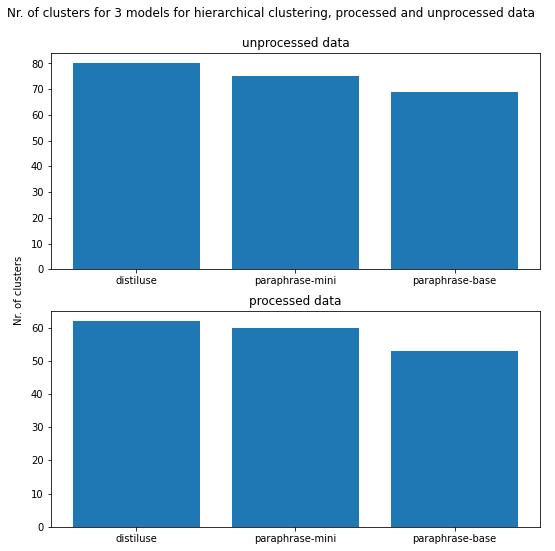

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

"""
Visualize the various metrics for the various models for hierarchical clustering.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
"""

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# Subplots - change arguments here for every score
ax1.bar(models, orig_nr_clusters)
ax2.bar(models, proc_nr_clusters)

# Set the suptitle and common labels - change here for every score
fig.suptitle('Nr. of clusters for 3 models for hierarchical clustering, processed and unprocessed data')
ax.set_ylabel('Nr. of clusters')

# Set the subplot titles
ax1.set_title('unprocessed data')
ax2.set_title('processed data')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('hierar-nr-clusters.png', dpi=300)
plt.show()


Now we will perform hierarchical clustering while sending in a specific nr. of clusters we would like to produce. In this way we will be able to make a more direct comparison between the results of K-means clustering and the results of hierarchical clustering. 

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

"""
A function for hierarchical clustering and evaluating the quality of the clusters 
using the Silhouette Score, the Calinski-Harabasz Index and the Davies-Bouldin Index.

Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'.
"""

def hierarchical_clustering(min_clusters, max_clusters, embeddings):
  
  # Array with different numbers of clusters
  num_clusters = [x for x in range (min_clusters,max_clusters)]

  # The arrays to hold the scores
  silhouette_scores = []
  calinski_harabasz_scores = []
  davies_bouldin_scores = []

  # The 2-d array to hold the arrays of cluster assignment
  cluster_assignments = []

  # Clustering for different numbers of clusters
  for number in num_clusters:
    # Change here for different linkage criteria, affinity, etc. 
    clustering_model = AgglomerativeClustering(n_clusters=number)
    clustering_model.fit(embeddings)
    cluster_assignment = clustering_model.labels_
    cluster_assignments.append(cluster_assignment)
    
    # Compute the Silhouette Score
    sil_score = metrics.silhouette_score(embeddings, cluster_assignment, metric='cosine')
    silhouette_scores.append(sil_score)

    # Compute the Calinski-Harabasz Index
    calinski_harabasz_idx = metrics.calinski_harabasz_score(embeddings, cluster_assignment)
    calinski_harabasz_scores.append(calinski_harabasz_idx)

    # Compute the Davies-Bouldin Index
    davies_bouldin_idx = metrics.davies_bouldin_score(embeddings, cluster_assignment)
    davies_bouldin_scores.append(davies_bouldin_idx)

  return (silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores, cluster_assignments)

In [15]:
"""
Hierarchical clustering for the different models. 
"""

# Define the parameters
min_clusters = 5
max_clusters = 15

# distiluse-base-multilingual-cased-v2 model
# Perform hierarchical clustering on both datasets
(orig_distil_silh_scores, orig_distil_calin_scores, orig_distil_davies_scores, 
 orig_distil_cluster_ass) = hierarchical_clustering(min_clusters, max_clusters, orig_embeddings_distiluse_arr)

(proc_distil_silh_scores, proc_distil_calin_scores, proc_distil_davies_scores, 
 proc_distil_cluster_ass) = hierarchical_clustering(min_clusters, max_clusters, proc_embeddings_distiluse_arr)

# paraphrase-multilingual-MiniLM-L12-v2 model
# Perform hierarchical clustering on both datasets
(orig_para_mini_silh_scores, orig_para_mini_calin_scores, orig_para_mini_davies_scores, 
 orig_para_mini_cluster_ass) = hierarchical_clustering(min_clusters, max_clusters, orig_embeddings_para_mini_arr)

(proc_para_mini_silh_scores, proc_para_mini_calin_scores, proc_para_mini_davies_scores, 
 proc_para_mini_cluster_ass) = hierarchical_clustering(min_clusters, max_clusters, proc_embeddings_para_mini_arr)

# paraphrase-multilingual-mpnet-base-v2
# Perform hierarchical clustering on both datasets
(orig_para_base_silh_scores, orig_para_base_calin_scores, orig_para_base_davies_scores, 
 orig_para_base_cluster_ass) = hierarchical_clustering(min_clusters, max_clusters, orig_embeddings_para_base_arr)

(proc_para_base_silh_scores, proc_para_base_calin_scores, proc_para_base_davies_scores, 
 proc_para_base_cluster_ass) = hierarchical_clustering(min_clusters, max_clusters, proc_embeddings_para_base_arr)

In [ ]:
# Print the clusters

items_orig = df_orig_1_emb_distiluse['item_orig'].values.tolist()
items_proc = df_proc_1_emb_distiluse['item_proc'].values.tolist()

idx = 0
# Change here for different model and dataset
print("Silhouette scores = ", proc_para_base_silh_scores)
print("Calinski-Hab scores = ", proc_para_base_calin_scores)
print("Davies-Boul scores = ", proc_para_base_davies_scores)

for i in range(min_clusters, max_clusters):
  print("Clusters for nr. of clusters = ", i)
  # Change here for different model and dataset
  cluster_ass = proc_para_base_cluster_ass[idx]
  
  clustered_items = {}
  for sentence_id, cluster_id in enumerate(cluster_ass):
      if cluster_id not in clustered_items:
          clustered_items[cluster_id] = []
          # Change here for different model and dataset (items_proc vs. items_orig)
      clustered_items[cluster_id].append(items_proc[sentence_id])

  for i, cluster in clustered_items.items():
      print("Cluster ", i+1)
      print(cluster)
      print("")
  
  idx += 1

In [22]:
"""
Save the clustering assignments into the appropriate dataframes. 
"""
# Variables to be used later
idx_distil = 0
idx_para_mini = 0
idx_para_base = 0

# distiluse-base-multilingual-cased-v2 model
# Add cluster assignments to dataframes
for i in range(min_clusters, max_clusters):
  df_orig_1_distiluse_hierar['distil-hierar-' + str(i)] = orig_distil_cluster_ass[idx_distil]
  idx_distil += 1

idx_distil = 0

for i in range(min_clusters, max_clusters):
  df_proc_1_distiluse_hierar['distil-hierar-' + str(i)] = proc_distil_cluster_ass[idx_distil]
  idx_distil += 1

# paraphrase-multilingual-MiniLM-L12-v2 model
# Add cluster assignments to dataframes
for i in range(min_clusters, max_clusters):
  df_orig_1_para_mini_hierar['para-mini-hierar-' + str(i)] = orig_para_mini_cluster_ass[idx_para_mini]
  idx_para_mini += 1

idx_para_mini = 0

for i in range(min_clusters, max_clusters):
  df_proc_1_para_mini_hierar['para-mini-hierar-' + str(i)] = proc_para_mini_cluster_ass[idx_para_mini]
  idx_para_mini += 1

# paraphrase-multilingual-mpnet-base-v2
# Add cluster assignments to dataframes
for i in range(min_clusters, max_clusters):
  df_orig_1_para_base_hierar['para-base-hierar-' + str(i)] = orig_para_base_cluster_ass[idx_para_base]
  idx_para_base += 1

idx_para_base = 0

for i in range(min_clusters, max_clusters):
  df_proc_1_para_base_hierar['para-base-hierar-' + str(i)] = proc_para_base_cluster_ass[idx_para_base]
  idx_para_base += 1

In [23]:
"""
Save the resulting dataframes to csv files. 
"""
df_orig_1_distiluse_hierar.to_csv('df-orig-1-distiluse-hierar.csv', index=False)
df_orig_1_para_mini_hierar.to_csv('df-orig-1-para-mini-hierar.csv', index=False)
df_orig_1_para_base_hierar.to_csv('df-orig-1-para-base-hierar.csv', index=False)

df_proc_1_distiluse_hierar.to_csv('df-proc-1-distiluse-hierar.csv', index=False)
df_proc_1_para_mini_hierar.to_csv('df-proc-1-para-mini-hierar.csv', index=False)
df_proc_1_para_base_hierar.to_csv('df-proc-1-para-base-hierar.csv', index=False)


In [24]:
# Load the scores

# linkage=average, affinity=cosine
orig_ave_distil_sil_scores = [0.08834544891824286, 0.0792380946933381, 0.07622411802197969,
                         0.07852642132434753, 0.10189981694726886, 0.09670278183663447,
                         0.09417470218167352, 0.08780022239915762, 0.08745177524116732,
                         0.08081877072925948]
orig_ave_distil_calinski_scores = [12.201688462477101, 10.00456926497428, 9.508868477108747,
                              9.20022733480018, 11.052307769422029, 10.200997228684477,
                              9.389087493744217, 8.897555734541852, 8.410444294042495,
                              7.898195566893343]
orig_ave_distil_davies_scores = [3.225368773650151, 2.7478310568848046, 2.736055164026269,
                            2.726888512068097, 2.6666819231163137, 2.5398630517459475,
                            2.421034068009786, 2.388954353177819, 2.3091620402442223,
                            2.2695165793638585]


orig_ave_para_base_sil_scores = [0.09627538113095437, 0.08910780471629916, 0.0814312401535328,
                                 0.10781334430319012, 0.1046304154822653, 0.09010348392086634,
                                 0.08276077696404281, 0.07965500023871161, 0.11004047680498377, 0.10847203630740293]
orig_ave_para_base_calinski_scores = [4.3967349667337094, 4.152607117789344, 3.6927707212527325,
                                      8.954891011473656, 8.156800434808888, 7.637769499222045,
                                      7.0186768377563435, 7.1739405652277926, 9.018650041441242, 8.519723957989713]
orig_ave_para_base_davies_scores = [2.3630276146084848, 2.130673393290369, 1.8841840877958067,
                                    2.071393738360113, 1.9875298368785161, 2.0959376646073706, 1.9242795802595423,
                                    1.9149041014858448, 2.0064271897580186, 2.0010025589780804]


orig_ave_para_mini_sil_scores = [0.09981496090175376, 0.10388573272696158, 0.09205556835227315,
                                 0.09475816149955214, 0.12663346421891952, 0.12320646172622364,
                                 0.11457975526100442, 0.12107201583294742, 0.12029965217046279, 0.1183537475749817]
orig_ave_para_mini_calinski_scores = [16.413252078073775, 15.656096196844857, 13.256241828333204, 12.185735446561658,
                                      14.340232732819734, 13.307623763474286, 12.125075775143387,
                                      11.972091650763137, 11.393870872394134, 10.966704077439005]
orig_ave_para_mini_davies_scores = [2.687283565406615, 2.5821204358559897, 2.2669415709216127,
                                    2.2388069846255725, 2.3086282052069134, 2.311676927893362,
                                    2.1768159196625394, 2.165679699038481, 2.1663378037735486, 2.097091312404047]


proc_ave_distil_sil_scores = [0.11759193837869789, 0.10947699595792164, 0.09893683710301307, 
                              0.09695376470497805, 0.09351853649213925, 0.08179138567173254, 
                              0.07686921174274401, 0.06645305844586134, 0.05964704162584332, 0.06285902214079911]
proc_ave_distil_calinski_scores = [3.6288679018333334, 4.2366762458582325, 4.304898522818528,
                                   3.9075411034511163, 3.720688387358602, 3.7901258533996445,
                                   3.548007298943346, 3.439023712524149, 3.2721944121330453, 3.5444779657852945]
proc_ave_distil_davies_scores = [2.3374710937711582, 2.4044964921826124, 2.368318699264211,
                                 2.090019890446841, 2.020854776059135, 2.066947612890085,
                                 1.9075745162226483, 1.946495514571053, 1.8436917539776732, 1.9356083955737209]


proc_ave_para_base_sil_scores = [0.12130124415168111, 0.11986565228259867, 0.11121452951647509,
                                 0.10142999115904748, 0.10373196255825595, 0.10384570840646197,
                                 0.09408210751141304, 0.08759340085831259, 0.1257813798843561, 0.12095161852952543]
proc_ave_para_base_calinski_scores = [4.902651856904749, 4.872037224511131, 4.887990172385511,
                                      4.516745035862937, 4.552232332982201, 4.421129020885479,
                                      4.252304478132382, 3.992523215625641, 6.4922249336304265, 6.087938610230801]
proc_ave_para_base_davies_scores = [2.460037646894639, 2.295837174321584, 2.231876516887748,
                                    2.128587106195397, 2.038783854350723, 1.956838792597647,
                                    1.858298665910314, 1.7623875271714484, 1.927437564111523, 1.773783833937896]


proc_ave_para_mini_sil_scores = [0.10419070542721406, 0.10140050271348455, 0.10000845345848515,
                                 0.09343153258790715, 0.09202541802800845, 0.09383794832163414,
                                 0.07891610198429824, 0.08422857891264285, 0.0830461292802247, 0.08073709405046824]
proc_ave_para_mini_calinski_scores = [9.401789540519003, 8.989234778890982, 8.233358049943245,
                                      7.698262610880543, 7.253516979188587, 6.949168024660257,
                                      6.400949884593133, 6.282921395533661, 6.059114197848893, 5.755836430395855]
proc_ave_para_mini_davies_scores = [1.8720446322508455, 1.9251108488210065, 1.9032395749138196,
                                    1.915168626841274, 1.9811219807139078, 2.019622531695931,
                                    1.9113865247990547, 1.9119206960316666, 1.9242484961643949, 1.8979652413385448]


# linkage=ward (minimize variance)
orig_ward_distil_sil_scores = [0.07489302559563295, 0.08126095337316686, 0.09181517796163091,
                               0.10292798165686325, 0.10709039162611313, 0.11584555142222613,
                               0.11674453832550816, 0.12344696640431765, 0.1320159044963127, 0.139530544836008]
orig_ward_distil_calinski_scores = [19.41403850944264, 18.43702001137116, 17.7226824945154,
                                    17.12594328740969, 16.616751306597447, 16.140387380529873,
                                    15.615166959734358, 15.20724165322178, 14.849166793109585, 14.443634951662732]
orig_ward_distil_davies_scores = [3.383001502875488, 3.2022039000157534, 2.9985676100501206,
                                  3.089769657526265, 3.0512201374230035, 3.177696800432158,
                                  3.0215345733119245, 2.9196811885204443, 2.940275253848173, 2.8406716069026245]


orig_ward_para_base_sil_scores = [0.10762316754896557, 0.09762017148400375, 0.10463005278339522,
                                  0.11006579363772989, 0.1061214710571981, 0.10345579051803053,
                                  0.11468058040072124, 0.12396750973446974, 0.11782271744196084, 0.12432464205777258]
orig_ward_para_base_calinski_scores = [25.39720906340098, 23.005818143797924, 21.476804309233906,
                                       20.430198017394652, 19.617939724295066, 18.79837561473761,
                                       18.136114288910044, 17.463189473752873, 16.924949695456064, 16.467002383098695]
orig_ward_para_base_davies_scores = [3.5803861306658895, 3.410122853776677, 3.2260592051135224,
                                     3.0321502622699352, 2.8907227159035918, 2.768298748721447,
                                     2.8607915795134704, 2.778063515865382, 2.805556825571757, 2.7107778996322054]


orig_ward_para_mini_sil_scores = [0.13592745794002697, 0.13502357696557155, 0.12623386462778083,
                                  0.13205245133698232, 0.13640882884784256, 0.13041753210026807,
                                  0.14114650450498467, 0.1290763817543243, 0.1394442089526811, 0.14672274031057483]
orig_ward_para_mini_calinski_scores = [25.693179382859118, 23.4999555264387, 21.941798573044085,
                                       20.58915380797375, 19.595904448963758, 18.774274340189034,
                                       18.060591699831107, 17.502992317813362, 17.03055581155006, 16.55239947417815]
orig_ward_para_mini_davies_scores = [3.049734610051509, 2.990258828736843, 2.8494754530903323,
                                     2.8416942353619805, 2.653281412640437, 2.7036631193364125,
                                     2.6509551865942558, 2.8299295578523935, 2.7476079625043246, 2.6931515566194633]


proc_ward_distil_sil_scores = [0.06403980214825154, 0.04546493420498229, 0.054183320951731916,
                               0.06526721395059495, 0.07220375893349415, 0.08242835742700744,
                               0.09219325358031578, 0.0900453588204892, 0.09614969571664359, 0.09998585533604906]
proc_ward_distil_calinski_scores = [13.493817277440114, 12.907797073241932, 12.35408729959231,
                                    11.831535373872118, 11.401285151077873, 10.996277501933978,
                                    10.667537026974568, 10.388228174317637, 10.17051349522691, 9.970256096733557]
proc_ward_distil_davies_scores = [3.6228566339618937, 3.3870088562895684, 3.117852122474467,
                                  3.173031955797309, 3.0509681643398867, 3.0863224798008844,
                                  2.9865119080829006, 3.109279585499778, 2.968609646291503, 2.8953938698436805]


proc_ward_para_base_sil_scores = [0.0975217120835367, 0.09083658460779578, 0.08017544527579981,
                                  0.08652876975217162, 0.09584713247202839, 0.10110811645939931,
                                  0.10861716752678031, 0.08840175757529373, 0.09640826020580558, 0.0966781216753169]
proc_ward_para_base_calinski_scores = [21.43772691386676, 19.17526388528661, 17.633839756619796,
                                       16.50523590267578, 15.551823781291803, 14.764504254843011,
                                       14.078349118272108, 13.500004794380958, 13.03307069928613, 12.608653052687618]
proc_ward_para_base_davies_scores = [3.6170964799124534, 3.350224395907457, 3.315656256560852,
                                     3.0457879265168204, 3.0764624206999907, 3.0080472502963964,
                                     2.924173460847173, 2.987297042644077, 2.983589967509083, 2.8990805401044923]

proc_ward_para_mini_sil_scores = [0.11797376389554827, 0.10120785442551249, 0.11189466498327703,
                                  0.12354362634759597, 0.13279891804472535, 0.13775084437044716,
                                  0.14493966362720062, 0.10401772666628271, 0.10813080933089943, 0.11418485214209238]
proc_ward_para_mini_calinski_scores = [21.14926470106404, 19.000927169046403, 17.552859922025664,
                                       16.426988928200217, 15.521419018878705, 14.66993371199912,
                                       13.983399239697848, 13.43949634693728, 12.982393662079637, 12.58804729874333]
proc_ward_para_mini_davies_scores = [3.417278678839142, 3.236522667995761, 2.999397131456985,
                                     3.02778210642077, 2.950340622711535, 2.953833558579476,
                                     2.8013704141709908, 2.9575573939552453, 2.9027002175975243, 2.83704938409639]


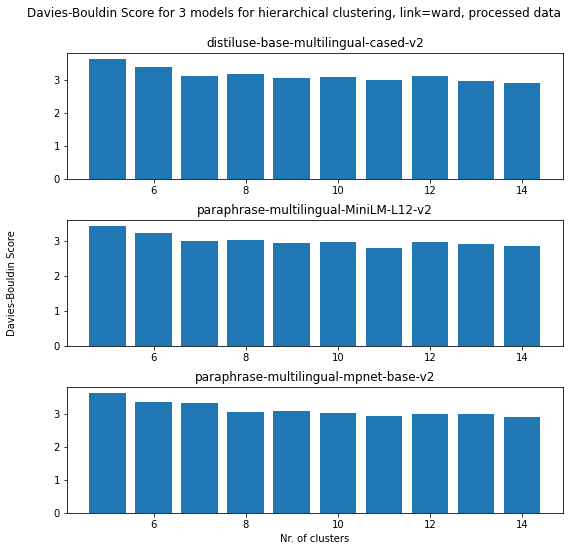

In [49]:
import matplotlib.pyplot as plt
import numpy as np

"""
Visualize the various metrics for the various models for hierarchical clustering.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
"""

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

num_clusters = [x for x in range (min_clusters, max_clusters)]
# Subplots - change arguments here for every score
ax1.bar(num_clusters, proc_ward_distil_davies_scores)
ax2.bar(num_clusters, proc_ward_para_mini_davies_scores)
ax3.bar(num_clusters, proc_ward_para_base_davies_scores)


# Set the suptitle and common labels - change here for every score
fig.suptitle('Davies-Bouldin Score for 3 models for hierarchical clustering, link=ward, processed data')
ax.set_xlabel('Nr. of clusters')
ax.set_ylabel('Davies-Bouldin Score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap and the ylabel position
plt.subplots_adjust(top=0.9)
ax.yaxis.set_label_coords(-0.1, 0.5)

# Save and plot - change here for every score
plt.savefig('proc-ward-davies.png', dpi=300)
plt.show()
